# IMDB DATASET

**PREDICTING THE RATINGS**

---
OUR AIM IS TO PREDICT THE RATINGS OF MOVIES DEPENDING ON THE DATA GIVEN TO US.

We begin by choosing our dataset, IMDB Movies because we find the topic interesting and predicting the rating is a crucial step for the movie industry. Dataset accessed is maintained of 993 observations of movies from different genres, different timelines. We use 12 variables which are the information given about the movies in the columns of the dataset. We aim to predict the ratings, which determine the enlargement of the audience of the said movies, by attending variables to given information such as runtime, Metascores, votes. In case we predict correctly we print “Correct Rating!”
The IMDB contains information of how the movies were liked by the audience, by providing ratings. Audience can vote from 1 to 10 depending on their interest in the movie. IMDB uses these numbers to calculate the movie’s rating. 
The Metascore is a weighted average of these calculations made by a sample size containing the famously known critics. In this sample group, the voting numbers are between 0-100. A runtime variable indicates the length of the movie in minutes. The votes indicate the number of votes cast by the audience. This benefits the film or vice versa. These variables are the most critical ones in our prediction. Before moving further, we process the data in great detail to reach our final information to be used. In order to reach a clear, net outcome we analyze the data to spot empty information. Therefore, we do data cleaning, resulting in some rows being deleted and some empty spaces being filled with calculated means. 


Data accessed from https://drive.google.com/file/d/1-1aZGfAlXgtn0gLfGpZdqXGGkfB_UbkG/view



---

Group Members:

* Ayçelen Kaptan
*  İrem Nur Kaya
*  Ceren Şahin
*   Duygu Bayoğlu
*   Serra Akar
*   Zeynep Merve Yaman 

---

> OUR PROCESS IS GIVEN BELOW RESPECTIVELY:

*   DATA CLEANING

*   EXPLORATORY DATA ANALYSIS

*   DATA VISUALIZATION
*   HYPOTHESIS TESTING


*   MACHINE LEARNING


*  RESULTS 











# *CLEANING THE DATA*


> STEPS:

*   DETECTING MISSING VALUES
*   IF THE MISSING VALUES ARE LESS THAN AN ACCEPTABLE PERCENTAGE THEN WE CAN REMOVE THEM. BUT IF THEY ARE GOING TO POSE A THREAT TO US WE SHOULD REPLACE THEM WITH THE MEAN.





In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


Then we added necessary libraries to facilitate visualization and manipulation of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

%matplotlib inline

In [ ]:
fname = "IMDB-Movie-Data-withID.csv"
path_prefix = './drive/My Drive' 
df = pd.read_csv(join(path_prefix, fname))
df.head(2)

,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0


In [ ]:
print("There are", len(df),  "lines of data in the \"IMDB-Movie-Data-withID.csv\" dataset with", len(df.columns), "features")
print("Data types in the \"IMDB-Movie-Data-withID.csv\" dataset:")
print(df.dtypes)
print()

There are 993 lines of data in the "IMDB-Movie-Data-withID.csv" dataset with 15 features
Data types in the "IMDB-Movie-Data-withID.csv" dataset:
Unnamed: 0              int64
Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
imdbID                  int64
movieLensID           float64
dtype: object



In [ ]:
df.isna().sum() #The number of missing data in each column 

Unnamed: 0              0
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    127
Metascore              63
imdbID                  0
movieLensID             0
dtype: int64

## **Data Exploration**



We analyzed the data by plotting each variables' own histogram. In order to understand the correlation between the features, we plotted the matrixes and the graphs of correlation. Our final step was to study how a movies' rating is affected by another variable.

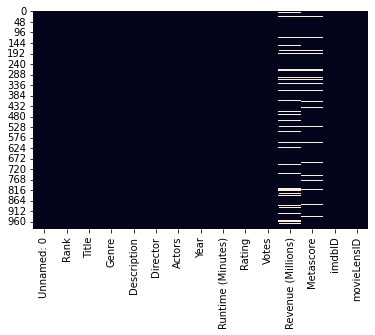

In [ ]:
#Heatmap of the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
per1 = df['Revenue (Millions)'].isna().sum()/df['Revenue (Millions)'].sum()*100 #Percentage of missing values in Revenue
per2 = df['Metascore'].isna().sum()/df['Metascore'].sum()*100 #Percentage of missing values in Metascore

print("The percentage of missing values in Revenue (Millions):",per1)
print("The percentage of missing values in Metascore:",per2)

The percentage of missing values in Revenue (Millions): 0.17580991266123464
The percentage of missing values in Metascore: 0.1148838396732193


In [ ]:
#Replacing the missing values with the mean of the column
df['Revenue (Millions)'].dtype
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].astype(float).mean(), inplace = True)
df.isna().sum()
df['Revenue (Millions)'].mean()

83.4146766743649

In [ ]:
#Replacing the missing values with the mean of the column
df['Metascore'].dtype
df['Metascore'].fillna(df['Metascore'].astype(float).mean(), inplace = True)
df.isna().sum()
df['Metascore'].mean()

58.965591397849465

In [ ]:
df['Revenue (Millions)'].isna().sum()# We check here if the replacing method was successfull!

0

In [ ]:
df['Revenue (Millions)'].isna().sum()# We check here if the replacing method was successfull!

0

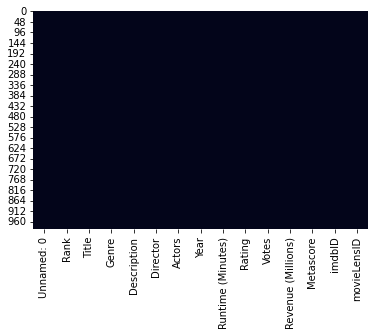

In [ ]:
sns.heatmap(df.isnull(), cbar=False) #Heatmap of missing values gone!
plt.show()

Text(0.5, 1.0, 'Boxplot of Revenue (Millions)')

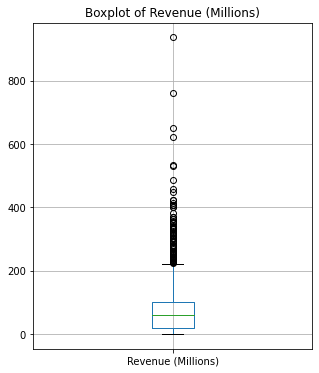

In [ ]:
plt.figure(figsize=(5,6))
sns.boxplot = df.boxplot(column=['Revenue (Millions)'])
plt.title("Boxplot of Revenue (Millions)")

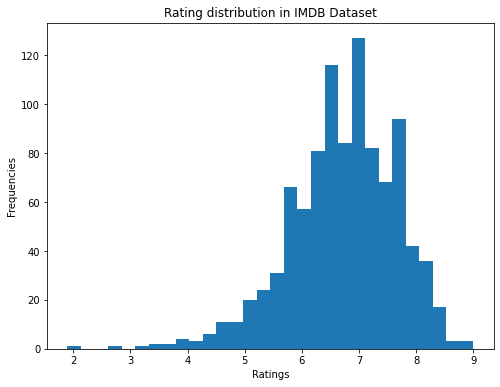

In [ ]:
rating = df["Rating"]

plt.figure(figsize=(8,6))
plt.hist(rating, bins='auto')
plt.xlabel("Ratings")
plt.ylabel("Frequencies")
plt.title("Rating distribution in IMDB Dataset")
plt.show()

Now we start plotting the graphs

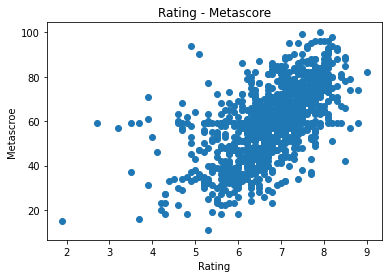

In [ ]:

plt.scatter(df["Rating"], df["Metascore"])
plt.title("Rating - Metascore")
plt.xlabel("Rating")
plt.ylabel("Metascroe")

plt.show()

We can see that there is a positive correlation between the rating and the metascore because they both increase at the same time.

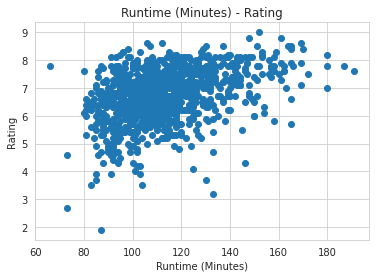

In [ ]:

plt.scatter(df["Runtime (Minutes)"], df["Rating"])
plt.title("Runtime (Minutes) - Rating")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Rating")

plt.show()

There is no correlation.

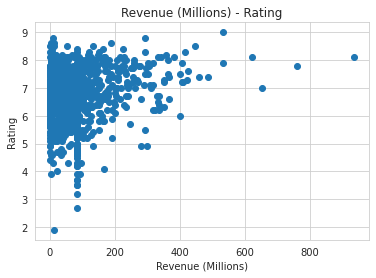

In [ ]:

plt.scatter(df["Revenue (Millions)"], df["Rating"])
plt.title("Revenue (Millions) - Rating")
plt.xlabel("Revenue (Millions)")
plt.ylabel("Rating")

plt.show()

*There* is a positive correlation.

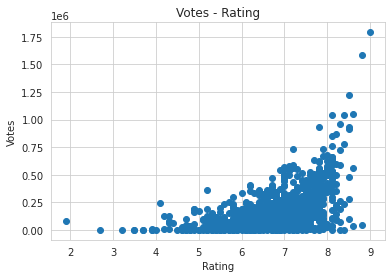

In [ ]:
plt.scatter(df["Rating"], df["Votes"])
plt.title("Votes - Rating")
plt.ylabel("Votes")
plt.xlabel("Rating")

plt.show()

*As* we look at this scatter plot there is a positive correlation.

# Explatory Data Analysis


*   Visualizing the data and showing the distributions
   



Below, we created a heatmap to see the correlations between numerical variables. The positive values at the matrix indicate a positive correlation whereas the negative values indicate a negative correlation. Lastly, if the value is equal to 0, it means that there is no correlation.

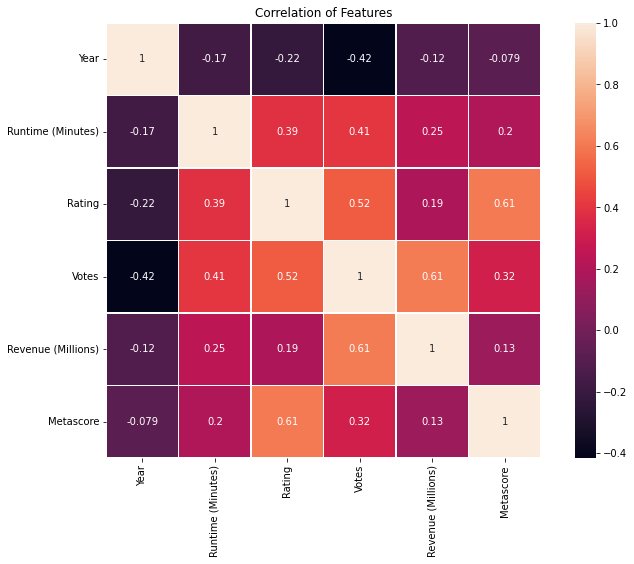

In [ ]:
#correlation matrix

columns = ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']

# Select only the selected columns from the DataFrame
df_selected = df.loc[:, columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Plot the heatmap
ax = sns.heatmap(corr, annot=True, square=True, linewidths=0.5)

# Add a title and display the plot
ax.set_title("Correlation of Features")
ax.figure.set_size_inches(12, 8)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

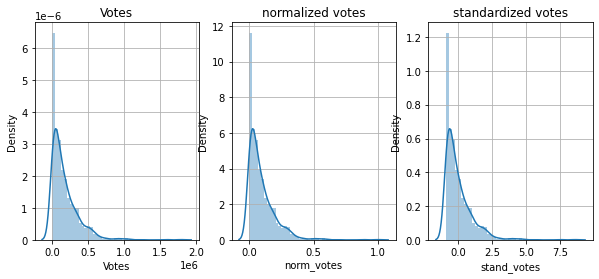

In [ ]:
min_vote = min(df["Votes"])
max_vote = max(df["Votes"])

df["norm_votes"] = df["Votes"].apply(lambda x: (x-min_vote)/(max_vote-min_vote))

#lets standardize the price column
mean = np.mean(df["Votes"])
std = np.std(df["Votes"])

df["stand_votes"] = df["Votes"].apply(lambda x: (x-mean)/std)

fig, axes = plt.subplots(1,3, figsize=(10,4))

sns.distplot(df["Votes"], ax=axes[0])
axes[0].set_title("Votes")
axes[0].grid()

sns.distplot(df["norm_votes"], ax=axes[1])
axes[1].set_title("normalized votes")
axes[1].grid()

sns.distplot(df["stand_votes"], ax=axes[2])
axes[2].set_title("standardized votes")
axes[2].grid()
plt.show()

we might see that densities of votes, normalized votes and standized votes.

### Hypothesis Testing

In this part, we tested the difference of the means of different samples which are the metascore values of the movies with a rating greater than 5 and metascore values of the movies with a rating smaller or equal to 5.

Null Hypothesis ( H0 ): Means of the two samples which are the metascore values of the movies with a rating greater than 5 and metascore values of the movies with a rating smaller or equal to 5 are equal.

Alternative Hypothesis ( HA ): Means of the two samples which are the metascore values of the movies with a rating greater than 5 and metascore values of the movies with a rating smaller or equal to 5 are not equal.


Now, let's check if there is any significant difference between the means of the movies who have a rating greater than 5 and those who do not. For this exercise, our focus is on metascore values.

In [ ]:
high_ratings = df[df["Rating"] > 5]["Metascore"]
low_ratings = df[df["Rating"] <= 5]["Metascore"]
high_rat = high_ratings.values
low_rat = low_ratings.values
print(f"mean rating of high rated movies: {np.mean(high_rat):.2f}")
print(f"mean rating of low rated movies: {np.mean(low_rat):.2f}")

mean rating of high rated movies: 59.69
mean rating of low rated movies: 44.10


From the figures below, we can see that the movies who have ratings greater than 5 obtained better metascore results on average compared to the ones who did not.

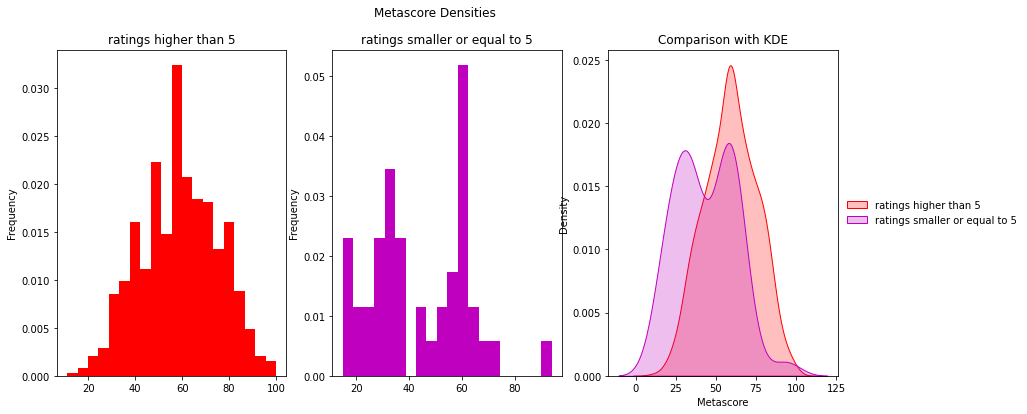

In [ ]:
import seaborn as sns

ig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
    
high_ratings.plot(kind="hist", ax=ax[0], bins=20, label="ratings higher than 5", color="r", density=True)
ax[0].set_title("ratings higher than 5")

low_ratings.plot(kind="hist", ax=ax[1], bins=20, label="ratings smaller or equal to 5", color="m", density=True)
ax[1].set_title("ratings smaller or equal to 5")

sns.kdeplot(high_ratings, shade=True, label="ratings higher than 5", ax=ax[2], color="r")
sns.kdeplot(low_ratings, shade=True, label="ratings smaller or equal to 5", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.suptitle("Metascore Densities")
plt.show()

Now, let's show this difference statistically by applying a significance test. Since we have two different distributions, we used the independence two-sample (unpaired) T-test.

The significance level, α , is the probability of rejecting the null hypothesis when it is true. We took our significance values as 0.05 so at the end of our code, we can say that we can predict this printed code by 95% likelihood.

In [ ]:
from scipy import stats
import scipy.stats as sp

alpha = 0.05
degree = len(high_ratings)-1

t_stat = stats.t.ppf(1- alpha, degree)
#print(t_stat)
value = stats.ttest_ind(high_ratings, low_ratings, equal_var=False).statistic
#print(value)
if t_stat < value:
  print("Null hypothesis is rejected.")
else:
  print("We fail to reject null hypothesis. ")

Null hypothesis is rejected.


The printed code is "Null hypothesis is rejected". It means that the null hypothesis is rejected with the probability of 95% and the means of our two different samples taken from the dataset are different from each other.

## Machine Learning Models
In this part, we will try to predict the rating of a movie with various machine learning models.

In [ ]:
import seaborn as sns # for data visualization 
%matplotlib inline
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")

### Prediction of movie rating with various machine learning models
In this part, we will check the correlations between "rating" and other features since in this part we are going to make a prediction of a movies' rating with various machine learning models.

Text(0.5, 1.0, 'Rating Distribution')

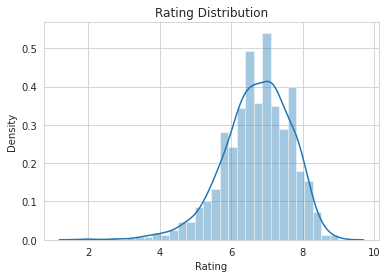

In [ ]:
df_final = df.dropna()
sns.distplot(df_final['Rating']).set_title('Rating Distribution')

Now we will check the correlation between different variables. Although we have created a heatmap previously, we will have a correlation table as we may need it in the upcoming parts.

In [ ]:
df_final.corr()

,Unnamed: 0,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID,norm_votes,stand_votes
Unnamed: 0,1.000000,0.999997,-0.279182,-0.180921,-0.169079,-0.227025,-0.137560,-0.161665,-0.189414,-0.290669,-0.227025,-0.227025
Rank,0.999997,1.000000,-0.279208,-0.180941,-0.169051,-0.226996,-0.137571,-0.161694,-0.189453,-0.290712,-0.226996,-0.226996
Year,-0.279182,-0.279208,1.000000,-0.161450,-0.227475,-0.466505,-0.145169,-0.077515,0.732810,0.938117,-0.466505,-0.466505
Runtime (Minutes),-0.180921,-0.180941,-0.161450,1.000000,0.395426,0.366148,0.127894,0.212397,-0.205696,-0.188523,0.366148,0.366148
Rating,-0.169079,-0.169051,-0.227475,0.395426,1.000000,0.496413,0.048244,0.589335,-0.178187,-0.242391,0.496413,0.496413
Votes,-0.227025,-0.226996,-0.466505,0.366148,0.496413,1.000000,0.470492,0.299490,-0.461302,-0.527130,1.000000,1.000000
Revenue (Millions),-0.137560,-0.137571,-0.145169,0.127894,0.048244,0.470492,1.000000,0.028609,-0.169282,-0.167252,0.470492,0.470492
Metascore,-0.161665,-0.161694,-0.077515,0.212397,0.589335,0.299490,0.028609,1.000000,0.024233,-0.054124,0.299490,0.299490
imdbID,-0.189414,-0.189453,0.732810,-0.205696,-0.178187,-0.461302,-0.169282,0.024233,1.000000,0.762501,-0.461302,-0.461302
movieLensID,-0.290669,-0.290712,0.938117,-0.188523,-0.242391,-0.527130,-0.167252,-0.054124,0.762501,1.000000,-0.527130,-0.527130


Although it is not necessary, we will convert the rating values into binary values.

In [ ]:
df_final.Rating.describe()

count    912.000000
mean       6.672478
std        0.933108
min        1.900000
25%        6.100000
50%        6.700000
75%        7.300000
max        8.800000
Name: Rating, dtype: float64

After looking at these results, we decided to define ratings above 7.3 as high ratings whereas ratings below 7.3 will be considered as low ratings. Using this model, we will encode high ratings as "1" and low ratings as "0".

In [ ]:
df_final.loc[df_final['Rating'] < 7.3, 'Rating'] = 0 
df_final.loc[df_final['Rating'] >= 7.3, 'Rating'] = 1
df_final.loc[df_final['Rating'] == 1 ]

,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,1.0,757074,333.13,76.000000,2015381,112852.0
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,1.0,157606,138.12,62.000000,4972582,166534.0
6,6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,1.0,258682,151.06,93.000000,3783958,164909.0
10,10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,1.0,232072,234.02,66.000000,3183660,135143.0
11,11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,1.0,93103,169.27,74.000000,4846340,166643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,975,Queen of Katwe,"Biography,Drama,Sport",A Ugandan girl sees her world rapidly change a...,Mira Nair,"Madina Nalwanga, David Oyelowo, Lupita Nyong'o...",2016,124,1.0,6753,8.81,73.000000,4341582,162596.0
972,972,980,The Skin I Live In,"Drama,Thriller","A brilliant plastic surgeon, haunted by past t...",Pedro Almodóvar,"Antonio Banderas, Elena Anaya, Jan Cornet,Mari...",2011,120,1.0,108772,3.19,70.000000,1189073,89118.0
975,975,983,Across the Universe,"Drama,Fantasy,Musical",The music of the Beatles and the Vietnam War f...,Julie Taymor,"Evan Rachel Wood, Jim Sturgess, Joe Anderson, ...",2007,133,1.0,95172,24.34,56.000000,445922,54190.0
982,982,990,Selma,"Biography,Drama,History",A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,1.0,67637,52.07,58.965591,1020072,118700.0


### Ratio Between High Ratings and Low Ratings

0.0    689
1.0    304
Name: Rating, dtype: int64

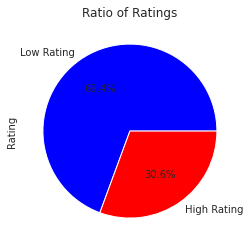

In [ ]:
df1 = df_final.copy()
ab = df1['Rating'].value_counts()
my_label=['Low Rating','High Rating'] 
my_colors=['blue','red']
ax = ab.plot(kind='pie', labels=my_label, autopct='%1.1f%%', colors=my_colors)
ax.set_title('Ratio of Ratings')
ax.plot()
df1.Rating.value_counts()

As we can see from the pie chart, we have an imbalanced dataset.

# Model Fitting and Predicting

Now we will continue with the model fitting and predicting. We will use different models:

Logistic Regression

Random Forest Classifier

K-Nearest Neighbors Classifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


We will now split the data into train (70%), validation (15%) and test (15%). We will use train_test_split with random_state parameter set to 0. Also we will drop some columns since they dont give any information such as non-numeric columns.

Moreover, as the data is imbalanced, we will use stratified splitting.

Some columns were dropped since they don't provide relevant information for the study.

In [ ]:
X = df_final.drop(["Rank","Rating", "Title", "Genre", "Description",
                   "Director", "Actors"],axis=1)
y = df_final["Rating"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.30, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50, stratify = y_remaining)

We will first try Random Forest Model, K-Nearest Neighbors and Logistic Regression to see which one will give the most accurate result.

We have to implement at least two machine learning models so that we can compare them. We decided to use Random Forest Model, K-Nearest Neighbors Classifier and Logistic Regression.

### Random Forest Model

Random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions

In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_val)
RFC_Accuracy = accuracy_score(y_val, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_val, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.8759124087591241
AUC: 0.8437990580847723


### K-Nearest Neighbors Classifier

The k-nearest-neighbor algorithm is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_val)
KNN_Accuracy = accuracy_score(y_val, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_val, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7664233576642335
AUC: 0.6823652537938252


### Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_val)
LR_Accuracy = accuracy_score(y_val, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_val, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.8321167883211679
AUC: 0.7514390371533229


#Results and Discussion


*   Comparison of different machine learning models



Random Forest: Accuracy = 0.86, AUC = 0.83
Logistic Regression: Accuracy = 0.83, AUC = 0.75
K-Nearest Neighbors: Accuracy = 0.77, AUC = 0.68


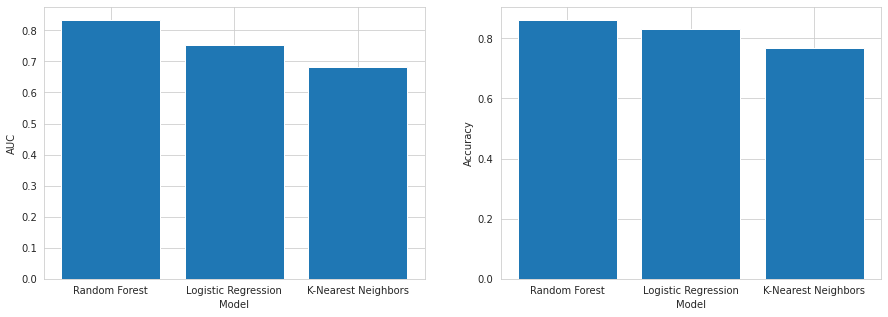

In [ ]:
#models
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]

#model names
model_names = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors']

#scores
auc_scores = []
acc_scores = []

for model, model_name in zip(models, model_names):
  # Fit the model to the training data
  model.fit(X_train, y_train)
  
  # Make predictions on the validation set
  y_pred = model.predict(X_val)
  
  score = roc_auc_score(y_val, y_pred)  

  
  # Append the score to the list
  auc_scores.append(score)

  acc = accuracy_score(y_val, y_pred)

  acc_scores.append(acc)

  print(f'{model_name}: Accuracy = {acc:.2f}, AUC = {score:.2f}')

# Create the bar plot

#AUC Comparison
x = model_names
y = auc_scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(x,y)
ax1.set_xlabel('Model')
ax1.set_ylabel('AUC')

#ACC comparison
x = model_names
y = acc_scores
ax2.bar(x,y)
ax2.set_xlabel('Model')
ax2.set_ylabel('Accuracy')
plt.show()

RandomForestClassifier gives us the most accurate solution.

# Plotting Confusion Matrix For Default Model

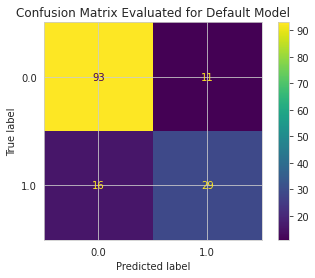

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(model, X_val, y_val)  

plt.title('Confusion Matrix Evaluated for Default Model', fontsize=12)
plt.show()

True Positive (TP) = 93; meaning 93 positive class data points were correctly classified

True Negative (TN) = 29; meaning 29 negative class data points were correctly classified

False Positive (FP) = 11; meaning 11 negative class data points were incorrectly classified

False Negative (FN) = 16; meaning 16 positive class data points were incorrectly classified

#Hyperparameter Tunning

We trainded the default model and now we will try different estimators to see if we can make our model even better. For this purpose we are going to use AUPRC (Area Under Precision-Recall Curve).

In [ ]:
from sklearn.metrics import auc,precision_recall_curve

In [ ]:
n_estimators = [100,200,300]

auc_values = []
for est in n_estimators:
  model = RandomForestClassifier(n_estimators = est)
  model.fit(X_train, y_train)
  
  preds = model.predict_proba(X_val)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_val, preds)

  auc_sol = auc(recall, precision)
  auc_values.append(auc_sol)

n_est_best = max(auc_values)
ix = auc_values.index(n_est_best)
print("The best n estimator value is:", n_estimators[ix])

The best n estimator value is: 200


We will train the model once more to make it better.

In [ ]:
best_model = RandomForestClassifier(n_estimators=n_estimators[ix], random_state=0)
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

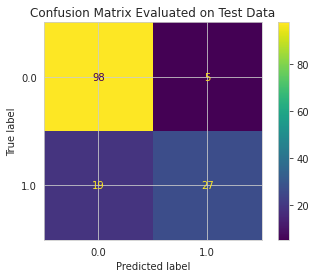

In [ ]:
y_pred = best_model.predict(X_test)

plot_confusion_matrix(best_model, X_test, y_test)  

plt.title('Confusion Matrix Evaluated on Test Data', fontsize=12)
plt.show()

## CONCLUSION

Using a dataset of 993 IMDB Movies, we were able to predict rating (greater than 7.3) using numerical metrics such as metascore, revenue and runtime without external metrics such as director name, genre, and description.
The Random Forest Classifier was the best performing algorithm with 95% accuracy and 83% AUC.

Our goal was to predict movie ratings using runtime, Metascore, and votes as variables because we believe they are related to the ratings. To do this, we analyzed the data and looked at the correlations between the variables. We also used hypothesis testing to see if our hypothesis was supported by the data. Finally, we used machine learning techniques to achieve our goal.

In summary, this project was successful as we were able to apply various methods learned during the semester to analyze the given dataset. Our machine learning techniques worked, and we determined that the Random Forest Model was the most effective for estimating the movie ratings.


## Work Division

For the progress report, we had regular meetings as a group in order to update each other and exchange ideas since many parts are common work of all. But in general Serra and Duygu worked on introduction, utilized dataset and data exploration; Zeynep and İrem worked on methods, feature generation and visualizations; Ceren and Ayçelen worked data preprocessing and analyzing. In the end we discussed future work. 

For the final report we had regular meetings as well and brainstormed different techniques. Serra, Duygu and Zeynep improved previous parts whereas İrem worked on hypothesis testing and Ceren and Ayçelen worked on machine learning.